# **How to Train a Model Using Local Data (2-D / Tabular Data)**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height (4).csv


In [3]:
import io

df = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
df.shape

(10000, 3)

In [7]:
df.ndim

2

In [8]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [14]:
x = df[['Height']].values
y_true = df[['Weight']].values

In [15]:
def line(x, w=0, b=0):
  return w * x + b

def mean_squared_error(y_ture, y_pred):
  s = (y_true - y_pred) ** 2
  return np.sqrt(s.mean())

Text(0.5, 0, 'b')

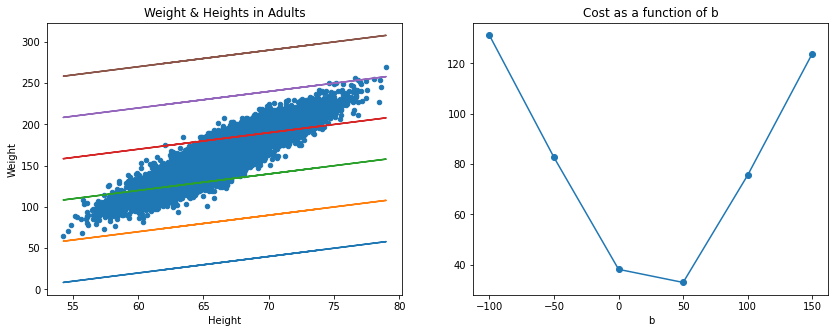

In [24]:
plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x = 'Height',
        y = 'Weight',
        title = 'Weight & Heights in Adults', ax = ax1)

bs = np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
  y_pred = line(x, w=2, b=b)
  mse = mean_squared_error(y_true, y_pred)
  mses.append(mse)
  plt.plot(x, y_pred)

ax2 = plt.subplot(122)
plt.plot(bs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## **Linear Regression with Keras**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
import io

from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height (6).csv


In [29]:
df = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [31]:
x = df[['Height']].values
y_true = df[['Weight']].values

In [32]:
x.shape

(10000, 1)

In [33]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [37]:
model.fit(x, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 0s 729us/step - loss: 617.0042
Epoch 2/40
313/313 [==============================] - 0s 784us/step - loss: 530.7108
Epoch 3/40
313/313 [==============================] - 0s 744us/step - loss: 463.3394
Epoch 4/40
313/313 [==============================] - 0s 723us/step - loss: 441.2534
Epoch 5/40
313/313 [==============================] - 0s 745us/step - loss: 356.7721
Epoch 6/40
313/313 [==============================] - 0s 753us/step - loss: 350.8602
Epoch 7/40
313/313 [==============================] - 0s 730us/step - loss: 304.7748
Epoch 8/40
313/313 [==============================] - 0s 754us/step - loss: 295.8003
Epoch 9/40
313/313 [==============================] - 0s 751us/step - loss: 255.3262
Epoch 10/40
313/313 [==============================] - 0s 847us/step - loss: 243.9846
Epoch 11/40
313/313 [==============================] - 0s 862us/step - loss: 226.6954
Epoch 12/40
313/313 [==============================] - 0s 778us

In [39]:
y_pred = model.predict(x)

In [40]:
y_pred

array([[215.21457],
       [176.5275 ],
       [217.22403],
       ...,
       [138.9953 ],
       [178.45486],
       [124.30182]], dtype=float32)

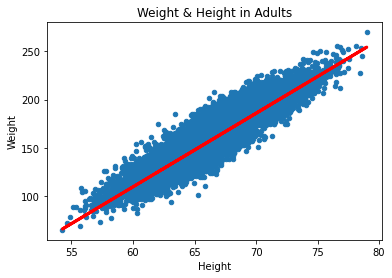

In [42]:
df.plot(kind='scatter',
        x = 'Height',
        y = 'Weight',
        title = 'Weight & Height in Adults')
plt.plot(x, y_pred, color='red', linewidth=3)

In [43]:
w,b = model.get_weights()

In [44]:
w

array([[7.637948]], dtype=float32)

In [45]:
b

array([-348.8251], dtype=float32)

In [46]:
model.predict([[200]])

array([[1178.7645]], dtype=float32)